<a href="https://colab.research.google.com/github/pranitakhade/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By: **Pranit Akhade**

## CREDIT CARD FRAUD DETECTION

*   Build a machine learning model to identify fraudulent credit card transactions.
*   Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
*   Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
*   Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.



In [ ]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.duplicated().sum()

1081

In [ ]:
data.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


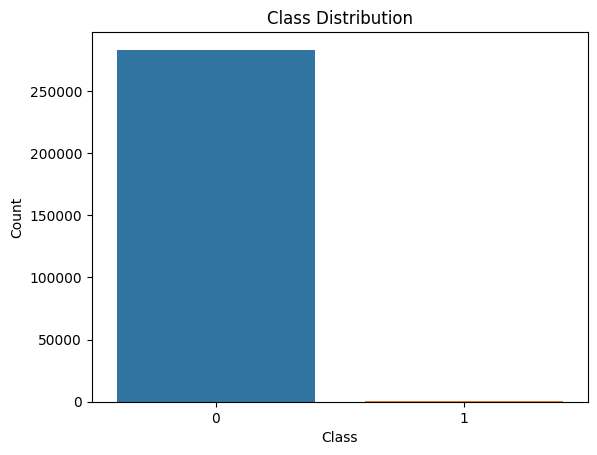

In [ ]:
sns.countplot(data = data, x = "Class",)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
legit = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
legit['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
legit_sample = legit.sample(473)

In [ ]:
legit_sample.shape

(473, 31)

In [ ]:
data1 = pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8285,11073.0,1.188330,-0.115327,0.960172,0.268923,-0.965080,-0.657067,-0.601208,-0.013868,1.612257,...,-0.012629,0.139063,0.009009,0.525519,0.115988,1.004482,-0.099381,-0.004424,15.95,0
228825,145679.0,-0.293556,0.794216,0.666737,0.251544,0.748847,0.104116,0.831573,-0.066013,0.013588,...,-0.132345,-0.229575,0.173337,0.580600,-1.242372,-1.245189,0.036380,0.044607,59.99,0
155828,106499.0,-0.505026,0.817335,2.397085,-0.102768,0.093716,-0.346623,0.570135,-0.283916,1.499545,...,-0.302780,-0.426609,-0.283412,-0.056023,0.269898,-0.731015,-0.082331,-0.144832,11.27,0
23350,32714.0,-0.832568,-0.135161,1.685788,-0.734815,0.204366,0.428801,-0.291961,0.255185,0.387629,...,-0.036485,0.070691,-0.251856,-0.738839,-0.555903,0.944510,0.053201,0.080852,49.95,0
266538,162374.0,1.960571,-0.477665,-0.329874,0.285327,-0.537326,0.044300,-0.733744,0.102350,0.938827,...,0.201027,0.804195,0.100793,-0.390749,-0.253448,0.576615,-0.016561,-0.059809,11.49,0


In [ ]:
X = data1.drop(['Class'], axis = 1)
y = data1["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = model.predict(X_train)
acc1 = accuracy_score(y_train, y_pred1)
acc1

0.9351851851851852

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

In [ ]:
print("Accuracy Score :" , acc)
print("Precision Score :" , prec)
print("Recall Score :" , rec)
print("F1 Score :" , f1)
print("MCC :" , MCC)

Accuracy Score : 0.9263157894736842
Precision Score : 0.94
Recall Score : 0.9215686274509803
F1 Score : 0.9306930693069307
MCC : 0.8522482006109737
